In [1]:
import pandas as pd
import os
import gzip
import matplotlib.pyplot as plt

# Налаштування графіків
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# Задайте відносний шлях до файлів
current_directory = os.getcwd()  # Поточна робоча директорія
log_file = 'access.log-20230921.gz'  # Файл для аналізу
output_file = 'site_logs.csv'  # Назва файлу для запису результатів

log_path = os.path.join(current_directory, log_file)
output_path = os.path.join(current_directory, output_file)

def process_log_file(log_path, output_file):
    total_lines = 0

    # Відкриття gzip файлу для читання
    with gzip.open(log_path, 'rb') as f:
        print(f'{log_path} is opened')
        with open(output_file, 'w', encoding='UTF-8') as result:
            for line in f:
                line = line.decode(errors='ignore').strip()
                if line:
                    result.write(f'{line}\n')
                    total_lines += 1

    return total_lines

# Обробка лог-файлу
total_lines = process_log_file(log_path, output_path)

print(f'File: {log_file}')
print(f'Total lines written to {output_file}: {total_lines}')

C:\Users\Yar\Desktop\гадюка\Senior\2\access.log-20230921.gz is opened
File: access.log-20230921.gz
Total lines written to site_logs.csv: 754995


In [2]:
log_df = pd.read_csv(log_file, sep=' ', encoding='UTF-8')

In [3]:
print(log_df.columns)

Index(['72.14.199.161', '-', '-.1', '[20/Sep/2023:03:21:05', '+0300]',
       'GET /rus/product/shampanske-veuve-clicquot-ponsardin-rose-suhe HTTP/1.1',
       '200', '19912', '-.2',
       'Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.5938.88 Mobile Safari/537.36 (compatible; AdsBot-Google-Mobile; +http://www.google.com/mobile/adsbot.html)',
       '-.3'],
      dtype='object')


In [3]:
headers = ['IP', 'Delimiter2', 'Delimiter3', 'Date', 'Time zone', 'Request', 'Status code', 'Bytes', 'Referer', 'User-Agent', 'Unknown']
log_df.columns = headers
log_df.head(2)

,IP,Delimiter2,Delimiter3,Date,Time zone,Request,Status code,Bytes,Referer,User-Agent,Unknown
0,72.14.199.160,-,-,[20/Sep/2023:03:21:09,+0300],GET /product/konyak-remy-martin-vsop-5 HTTP/1.1,200,20825,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,-
1,212.142.103.56,-,-,[20/Sep/2023:03:21:12,+0300],GET /brands/cardhu?country-filter=shotlandiya ...,200,16067,-,Mozilla/5.0 (compatible; GeedoBot; +http://www...,-


In [4]:
log_df.drop(['Delimiter2','Delimiter3','Time zone', "Unknown"], axis=1, inplace=True)
log_df.head(2)

,IP,Date,Request,Status code,Bytes,Referer,User-Agent
0,72.14.199.160,[20/Sep/2023:03:21:09,GET /product/konyak-remy-martin-vsop-5 HTTP/1.1,200,20825,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...
1,212.142.103.56,[20/Sep/2023:03:21:12,GET /brands/cardhu?country-filter=shotlandiya ...,200,16067,-,Mozilla/5.0 (compatible; GeedoBot; +http://www...


In [5]:
new_df = log_df['Request'].str.split(' ', n=2, expand=True)
new_df.columns = ['Method', 'Path', 'Protocol']
log_df = pd.concat([log_df, new_df], axis=1)
log_df.drop(['Request'], axis=1, inplace=True)
log_df.head(2)

,IP,Date,Status code,Bytes,Referer,User-Agent,Method,Path,Protocol
0,72.14.199.160,[20/Sep/2023:03:21:09,200,20825,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/product/konyak-remy-martin-vsop-5,HTTP/1.1
1,212.142.103.56,[20/Sep/2023:03:21:12,200,16067,-,Mozilla/5.0 (compatible; GeedoBot; +http://www...,GET,/brands/cardhu?country-filter=shotlandiya,HTTP/1.1


In [6]:
log_df = log_df[~log_df['Date'].str.contains('Mobile', na=False)]
log_df = log_df[~log_df['Date'].str.contains('0200]', na=False)]

log_df['Date'] = log_df['Date'].str.replace('[', '', regex=False)
log_df['Date'] = log_df['Date'].str.replace(']', '', regex=False) 

log_df['Date'] = pd.to_datetime(log_df['Date'], format='%d/%b/%Y:%H:%M:%S')

log_df.head(2)

,IP,Date,Status code,Bytes,Referer,User-Agent,Method,Path,Protocol
0,72.14.199.160,2023-09-20 03:21:09,200,20825,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/product/konyak-remy-martin-vsop-5,HTTP/1.1
1,212.142.103.56,2023-09-20 03:21:12,200,16067,-,Mozilla/5.0 (compatible; GeedoBot; +http://www...,GET,/brands/cardhu?country-filter=shotlandiya,HTTP/1.1


In [7]:
log_df['User-Agent'] = log_df['User-Agent'].astype(str)
log_df.head()

,IP,Date,Status code,Bytes,Referer,User-Agent,Method,Path,Protocol
0,72.14.199.160,2023-09-20 03:21:09,200,20825,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/product/konyak-remy-martin-vsop-5,HTTP/1.1
1,212.142.103.56,2023-09-20 03:21:12,200,16067,-,Mozilla/5.0 (compatible; GeedoBot; +http://www...,GET,/brands/cardhu?country-filter=shotlandiya,HTTP/1.1
2,10.110.9.155,2023-09-20 03:21:12,200,0,-,Mozilla/5.0 (compatible; PRTG Network Monitor ...,HEAD,/,HTTP/1.1
3,72.14.199.160,2023-09-20 03:21:14,200,19783,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/product/gorlka-osobliva-legka-gorlka-vozduh-n...,HTTP/1.1
4,72.14.199.160,2023-09-20 03:21:18,200,20471,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/product/vermut-marengo-mojito-sladkiy,HTTP/1.1


In [8]:
#Коди відповідей (усі) які є в файлі
import pandas as pd

response_counts = log_df['Status code'].value_counts().reset_index()
response_counts.columns = ['Response Code', 'Count']

print(response_counts)


    Response Code   Count
0             200  733867
1             499    9243
2             201    5340
3             204    2225
4             302    1532
5             404     959
6             301     876
7             400     411
8             403     194
9             401     174
10            206     112
11            504      31
12            500      12
13            502       7
14            304       5
15            444       5
16            405       1


In [10]:
#Визначення ботів
import pandas as pd
import requests
import ipaddress

# Завантаження IP-префіксів з JSON-ресурсів
def load_ip_prefixes(urls):
    prefixes = []
    for url in urls:
        try:
            response = requests.get(url)
            data = response.json()
            for prefix in data.get("prefixes", []):
                if "ipv4Prefix" in prefix:
                    prefixes.append(prefix["ipv4Prefix"])
                elif "ipv6Prefix" in prefix:
                    prefixes.append(prefix["ipv6Prefix"])
        except Exception as e:
            print(f"Помилка при завантаженні {url}: {e}")
    return prefixes

# Список URL для завантаження IP-префіксів
urls = [
    "https://developers.google.com/static/search/apis/ipranges/googlebot.json",
    "https://developers.google.com/static/search/apis/ipranges/special-crawlers.json",
    "https://developers.google.com/static/search/apis/ipranges/user-triggered-fetchers.json",
    "https://developers.google.com/static/search/apis/ipranges/user-triggered-fetchers-google.json",
    "https://developers.google.com/search/apis/ipranges/googlebot.json"
]

# Завантаження префіксів
ip_prefixes = load_ip_prefixes(urls)

# Перевірка, чи IP-адреса належить до одного з префіксів
def is_valid_bot_ip(ip):
    try:
        ip_addr = ipaddress.ip_address(ip)
        for prefix in ip_prefixes:
            if ip_addr in ipaddress.ip_network(prefix):
                return True
        return False
    except ValueError:
        return False

# Додавання визначення ботів на основі User-Agent та IP-адреси
bot = []
for index, row in log_df.iterrows():
    ua = row['User-Agent']
    ip = row['IP']  # Припускається, що в log_df є стовпець 'IP' з IP-адресами

    if 'Googlebot' in ua:
        if is_valid_bot_ip(ip):
            bot.append('Valid Googlebot')
        else:
            bot.append('Fake Googlebot')
    elif 'Storebot-Google' in ua:
        if is_valid_bot_ip(ip):
            bot.append('Valid Google StoreBot')
        else:
            bot.append('Fake Google StoreBot')
    elif 'Google-InspectionTool' in ua:
        if is_valid_bot_ip(ip):
            bot.append('Valid Google InspectionTool')
        else:
            bot.append('Fake Google InspectionTool')
    elif 'GoogleOther' in ua:
        if is_valid_bot_ip(ip):
            bot.append('Valid GoogleOther')
        else:
            bot.append('Fake GoogleOther')
    elif 'bingbot' in ua or 'adidxbot' in ua:
        if is_valid_bot_ip(ip):
            bot.append('Valid Bingbot')
        else:
            bot.append('Fake Bingbot')
    elif 'AhrefsBot' in ua:
        bot.append('AhrefsBot')
    elif 'YandexBot' in ua:
        bot.append('YandexBot')
    else:
        bot.append('Other Bot')

log_df['Bot'] = bot

# Відображення перших рядків DataFrame
log_df.head()

,IP,Date,Status code,Bytes,Referer,User-Agent,Method,Path,Protocol,Bot
0,72.14.199.160,2023-09-20 03:21:09,200,20825,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/product/konyak-remy-martin-vsop-5,HTTP/1.1,Other Bot
1,212.142.103.56,2023-09-20 03:21:12,200,16067,-,Mozilla/5.0 (compatible; GeedoBot; +http://www...,GET,/brands/cardhu?country-filter=shotlandiya,HTTP/1.1,Other Bot
2,10.110.9.155,2023-09-20 03:21:12,200,0,-,Mozilla/5.0 (compatible; PRTG Network Monitor ...,HEAD,/,HTTP/1.1,Other Bot
3,72.14.199.160,2023-09-20 03:21:14,200,19783,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/product/gorlka-osobliva-legka-gorlka-vozduh-n...,HTTP/1.1,Other Bot
4,72.14.199.160,2023-09-20 03:21:18,200,20471,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/product/vermut-marengo-mojito-sladkiy,HTTP/1.1,Other Bot


In [11]:
import re

# Видалення пропущених значень у DataFrame
log_df = log_df.dropna().copy()

# Переконаємося, що всі значення в колонці 'Path' є рядками
log_df.loc[:, 'Path'] = log_df['Path'].astype(str)

# Список для збереження типів сторінок
page_types = []

# Перевірка шляху (Path) для визначення типу сторінки
for p in log_df['Path']:
    if p in ['/', 'https://bayadera.ua/', 'http://bayadera.ua/']:
        # Головна сторінка
        page_types.append('Main')
    elif '/product/' in p:
        # Сторінки товарів
        page_types.append('Product')
    elif re.match(r'^/category/[^/]+/[^/]+$', p):
        # Категорії з двома вкладеностями після /category/
        page_types.append('Category')
    elif re.match(r'^/category/(.+/){2,}', p):
        # Сторінки фільтрів з більше ніж двома вкладеностями після /category/
        page_types.append('Filter')
    elif 'page=' in p:
        # Сторінки пагінації
        page_types.append('Pagination')
    elif '/posts' in p:
        # Блог
        page_types.append('Blog')
    elif '/brands/' in p:
        # Сторінки брендів
        page_types.append('Brand')
    elif re.search(r'\.(jpg|jpeg|png|gif|webp)$', p, re.IGNORECASE):
        # Зображення
        page_types.append('Images')
    else:
        # Інші сторінки
        page_types.append('Other')

# Додавання нового стовпця до DataFrame
log_df.loc[:, 'Page type'] = page_types

# Виведення перших 10 рядків DataFrame
log_df.head(10)


,IP,Date,Status code,Bytes,Referer,User-Agent,Method,Path,Protocol,Bot,Page type
0,72.14.199.160,2023-09-20 03:21:09,200,20825,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/product/konyak-remy-martin-vsop-5,HTTP/1.1,Other Bot,Product
1,212.142.103.56,2023-09-20 03:21:12,200,16067,-,Mozilla/5.0 (compatible; GeedoBot; +http://www...,GET,/brands/cardhu?country-filter=shotlandiya,HTTP/1.1,Other Bot,Brand
2,10.110.9.155,2023-09-20 03:21:12,200,0,-,Mozilla/5.0 (compatible; PRTG Network Monitor ...,HEAD,/,HTTP/1.1,Other Bot,Main
3,72.14.199.160,2023-09-20 03:21:14,200,19783,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/product/gorlka-osobliva-legka-gorlka-vozduh-n...,HTTP/1.1,Other Bot,Product
4,72.14.199.160,2023-09-20 03:21:18,200,20471,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/product/vermut-marengo-mojito-sladkiy,HTTP/1.1,Other Bot,Product
5,72.14.199.160,2023-09-20 03:21:22,200,20279,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/rus/product/vino-vinogradne-aromatizovane-des...,HTTP/1.1,Other Bot,Product
6,66.249.79.32,2023-09-20 03:21:23,200,14274,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,GET,/brands/cadis,HTTP/1.1,Valid Googlebot,Brand
7,72.14.199.160,2023-09-20 03:21:31,200,20093,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/rus/product/gorlka-kozacka-rada-klasichna-05-...,HTTP/1.1,Other Bot,Product
8,109.229.213.23,2023-09-20 03:21:34,200,23782,-,Mozilla/5.0 (compatible; GeedoBot; +http://www...,GET,/category/strong-alcohol/gin/gin-velikobritani...,HTTP/1.1,Other Bot,Filter
9,72.14.199.160,2023-09-20 03:21:39,200,20713,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/product/vino-igristoe-arte-latino-cava-brut,HTTP/1.1,Other Bot,Product


Bot Distribution Table:
            Bot Type  Count  Percentage
0  Valid Google Bots   3586       83.18
1   Fake Google Bots     78        1.81
2   Other Valid Bots      0        0.00
3    Other Fake Bots    647       15.01


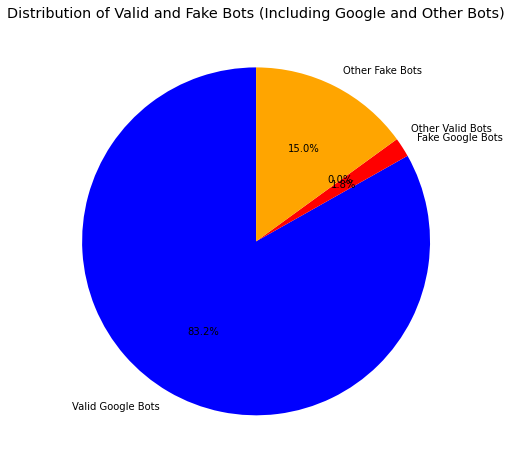

In [12]:
#Вивести графіки сканування ботами
# Фільтрація валідних і фейкових ботів
valid_bots = log_df[log_df['Bot'].str.contains('Valid', na=False)]
fake_bots = log_df[log_df['Bot'].str.contains('Fake', na=False)]

# Фільтрація Google-ботів
valid_google_bots = valid_bots[valid_bots['Bot'].str.contains('Google', na=False)]
fake_google_bots = fake_bots[fake_bots['Bot'].str.contains('Google', na=False)]

# Фільтрація інших ботів
other_valid_bots = valid_bots[~valid_bots['Bot'].str.contains('Google', na=False)]
other_fake_bots = fake_bots[~fake_bots['Bot'].str.contains('Google', na=False)]

# Підрахунок кількості ботів
valid_google_count = valid_google_bots.shape[0]
fake_google_count = fake_google_bots.shape[0]
other_valid_count = other_valid_bots.shape[0]
other_fake_count = other_fake_bots.shape[0]
total_count = valid_google_count + fake_google_count + other_valid_count + other_fake_count

# Створення таблиці з підрахунком
bot_summary = pd.DataFrame({
    'Bot Type': ['Valid Google Bots', 'Fake Google Bots', 'Other Valid Bots', 'Other Fake Bots'],
    'Count': [valid_google_count, fake_google_count, other_valid_count, other_fake_count],
    'Percentage': [
        round(valid_google_count / total_count * 100, 2), 
        round(fake_google_count / total_count * 100, 2),
        round(other_valid_count / total_count * 100, 2), 
        round(other_fake_count / total_count * 100, 2)
    ]
})

# Виведення таблиці
print("Bot Distribution Table:")
print(bot_summary)

# Дані для кругової діаграми
bot_counts = [valid_google_count, fake_google_count, other_valid_count, other_fake_count]
labels = ['Valid Google Bots', 'Fake Google Bots', 'Other Valid Bots', 'Other Fake Bots']

# Побудова кругової діаграми
plt.figure(figsize=(8, 8))
plt.pie(bot_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'red', 'green', 'orange'])
plt.title('Distribution of Valid and Fake Bots (Including Google and Other Bots)')
plt.show()

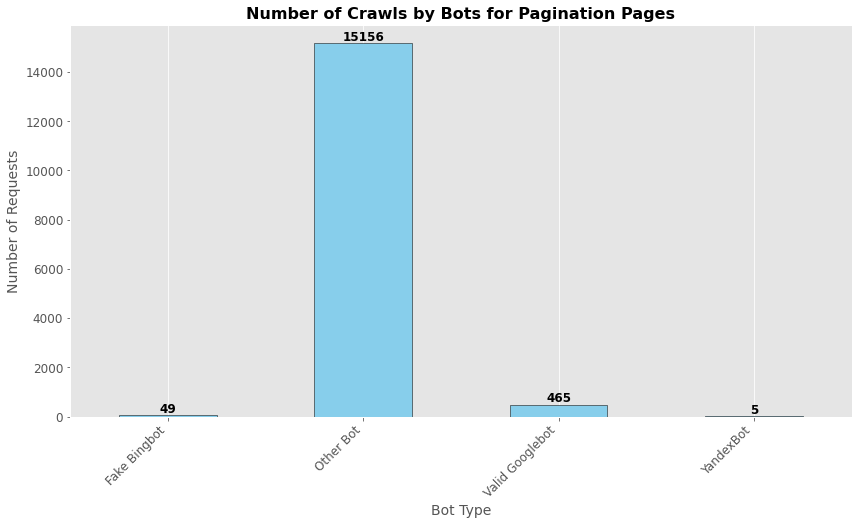

               Bot   Page type  Requests
0     Fake Bingbot  Pagination        49
1        Other Bot  Pagination     15156
2  Valid Googlebot  Pagination       465
3        YandexBot  Pagination         5


In [13]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Видалення пропущених значень у DataFrame
log_df = log_df.dropna().copy()

# Переконаємося, що всі значення в колонці 'Path' є рядками
log_df.loc[:, 'Path'] = log_df['Path'].astype(str)

# Список для збереження типів сторінок
page_types = []

# Перевірка шляху (Path) для визначення типу сторінки
for p in log_df['Path']:
    if p in ['/', 'https://bayadera.ua/', 'http://bayadera.ua/']:
        page_types.append('Main')
    elif '/product/' in p:
        page_types.append('Product')
    elif re.match(r'^/category/[^/]+/[^/]+$', p):
        page_types.append('Category')
    elif re.match(r'^/category/(.+/){2,}', p):
        page_types.append('Filter')
    elif 'page=' in p:
        page_types.append('Pagination')
    elif '/posts' in p:
        page_types.append('Blog')
    elif '/brands/' in p:
        page_types.append('Brand')
    elif re.search(r'\.(jpg|jpeg|png|gif|webp)$', p, re.IGNORECASE):
        page_types.append('Images')
    else:
        page_types.append('Other')

# Додавання нового стовпця до DataFrame
log_df.loc[:, 'Page type'] = page_types

# Фільтрація лише сторінок пагінації
pagination_df = log_df[log_df['Page type'] == 'Pagination']

# Групування за іменем бота і типом сторінки, з підрахунком кількості запитів
bot_pagination_counts = pagination_df.groupby(['Bot', 'Page type']).size().reset_index(name='Requests')

# Побудова діаграми для відображення краулінгу сторінок пагінації ботами
plt.figure(figsize=(14, 8))
ax = bot_pagination_counts.groupby('Bot')['Requests'].sum().plot(kind='bar', color='skyblue', edgecolor='black')

# Налаштування заголовків та осей
plt.title('Number of Crawls by Bots for Pagination Pages', fontsize=16, fontweight='bold')
plt.xlabel('Bot Type', fontsize=14)
plt.ylabel('Number of Requests', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Додавання значень на кожен стовпчик
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.subplots_adjust(bottom=0.2)
plt.show()

# Таблиця з кількістю запитів від ботів до сторінок пагінації за типами сторінок
pagination_counts_by_type = pagination_df.groupby(['Bot', 'Page type']).size().reset_index(name='Requests')

# Виведення таблиці
print(pagination_counts_by_type)
